In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile
from scipy.optimize import curve_fit

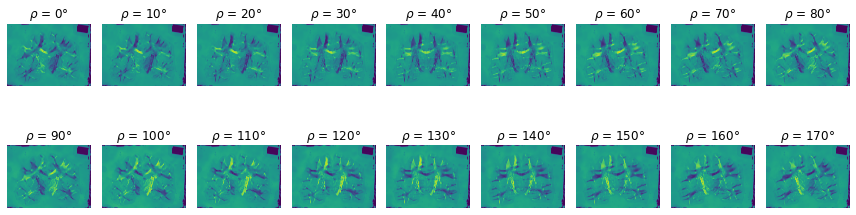

In [2]:
#Task 3.2 Load the images and extract the green channel
white_matter1 = []
white_matter2 = []
gray_matter1 = []
gray_matter2 = []
imagesList = []
rotationAngle = np.linspace(0, 170, num=18, dtype= int)

for k in range(0,180,10):
    image = tifffile.imread("expr3\exp3_t{:03d}.tif".format(k))
    gr = image[:,:,1]
    imagesList.append(gr)
    white_matter1.append(gr[1916][796])
    white_matter2.append(gr[1552][1300])
    gray_matter1.append(gr[724][1044])
    gray_matter2.append(gr[1044][704])
img = np.array(imagesList)
plt.figure(figsize =(12,4))
for k in range(len(img)):
    plt.subplot(2,9,k+1)
    plt.title(r"$\rho$ = " + str(rotationAngle[k]) + "°")
    plt.imshow(img[k,:,:])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
whitePixel = [[1916,796],[1552,1300]]
greyPixel = [[788,1072], [1044,704]]
randmPixel = whitePixel + greyPixel

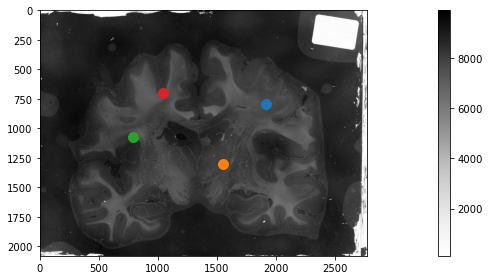

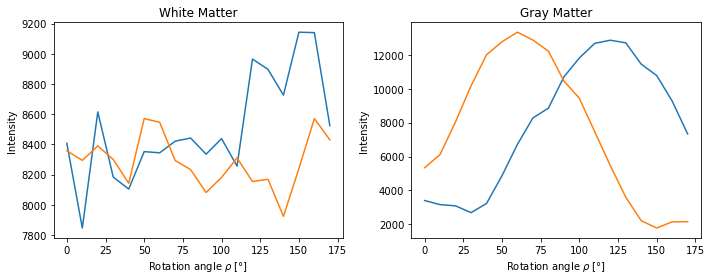

In [4]:
fig = plt.figure(figsize=(20, 4))
plt.imshow(np.mean(img,axis=0),cmap="Greys")
plt.colorbar()
plt.tight_layout()
for pixel in randmPixel:
    plt.scatter(pixel[0],pixel[1],marker="o",s=100)
plt.figure(figsize=(10, 4))
plt.subplot(121)
for pixel in whitePixel:
    plt.plot(rotationAngle,img[:,pixel[0],pixel[1]])
    plt.title('White Matter')
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
plt.subplot(122)
for pixel in greyPixel:
    plt.plot(rotationAngle,img[:,pixel[0],pixel[1]]) 
    plt.title('Gray Matter')
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
plt.tight_layout()
plt.show()

In [5]:
def calcFourierParam(intensity, rotationAngle, name):
    a0 = np.mean(intensity)
    a1 = 2*np.mean(intensity*np.sin(2*rotationAngle/180*np.pi))
    b1 = 2*np.mean(intensity*np.cos(2*rotationAngle/180*np.pi))

    transmittance = 2*a0
    retardance = (np.sqrt(a1**2 + b1**2))/a0
    direction_angle = (np.arctan2(-1*a1,b1))/2
    print(name,':') 
    print("\tFourier transmittance: " + str(transmittance))
    print("\tFourier retardance: " + str(retardance))
    print("\tFourier direction_angle: " + str(direction_angle))
    return a0 + a1*np.sin(2*rotationAngle/180*np.pi) +b1*np.cos(2*rotationAngle/180*np.pi)

def calcsin(rho, I, phi, d):
    return I/2*(1 + np.sin(2*(rho - phi)/180*np.pi)*np.sin(d/180*np.pi))

def plotIntensities(intensity, rotationAngle, name):
    Fourier = calcFourierParam(intensity, rotationAngle, name)
    [transmittance, direction_angle, retardance], _ = curve_fit(calcsin, rotationAngle, intensity)
    print(name,':')
    print("\tsin transmittance: " + str(transmittance))
    print("\tsin retardance: " + str(retardance))
    print("\tsin direction_angle: " + str(direction_angle))
    Sin = calcsin(rotationAngle, transmittance, direction_angle, retardance)
    plt.figure()
    plt.plot(rotationAngle, Fourier, 'kx', label="fourier")
    plt.plot(rotationAngle, Sin, 'r-', label="Sine")
    plt.plot(rotationAngle, intensity, 'b--', label = "original")
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
    plt.title(name)
    plt.legend()


white matter 1 :
	Fourier transmittance: 17015.333333333332
	Fourier retardance: 0.03919819349163989
	Fourier direction_angle: 0.7262380929154805
white matter 1 :
	sin transmittance: 17015.333332946946
	sin retardance: -182.24646658379828
	sin direction_angle: 8193.389622465975
white matter 2 :
	Fourier transmittance: 16576.222222222223
	Fourier retardance: 0.014275309564952118
	Fourier direction_angle: -0.45986089058363316
white matter 2 :
	sin transmittance: 16576.22222208089
	sin retardance: 0.8179427533517194
	sin direction_angle: -918.6519117164639
gray matter 1 :
	Fourier transmittance: 15197.444444444445
	Fourier retardance: 0.7077732069336948
	Fourier direction_angle: -1.3655285510062625
gray matter 1 :
	sin transmittance: 15197.444444654948
	sin retardance: 1214.9459750652795
	sin direction_angle: 98133.23902277576
gray matter 2 :
	Fourier transmittance: 15289.222222222223
	Fourier retardance: 0.7474742677234584
	Fourier direction_angle: -1.0877043774844897
gray matter 2 :
	si

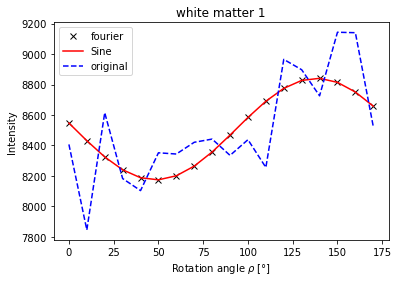

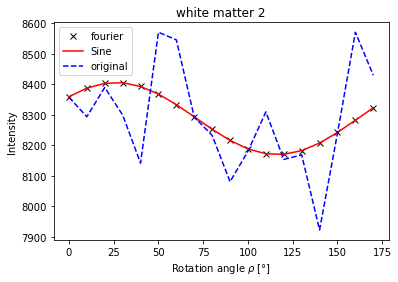

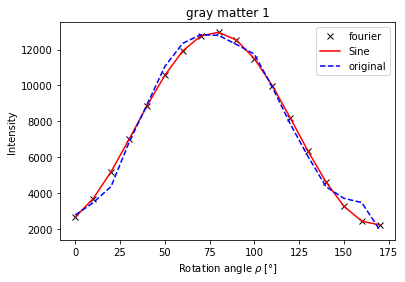

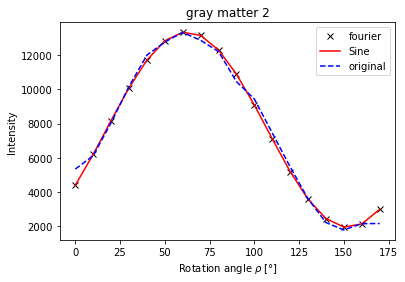

In [6]:
#Task2.3 Fitting function
plotIntensities(white_matter1, rotationAngle, "white matter 1")
plotIntensities(white_matter2, rotationAngle, "white matter 2")
plotIntensities(gray_matter1, rotationAngle, "gray matter 1")
plotIntensities(gray_matter2, rotationAngle, "gray matter 2")
plt.show()

In [7]:
# Task 3.5 Applying Fourier analysis to all image Pixels
allPixels = img.reshape(img.shape[0],img.shape[1]*img.shape[2])

a0_1 = 1 * np.mean(allPixels[:,:],axis=0)
a1_1 = 2 * np.mean(allPixels[:,:] * np.cos(2*rotationAngle[:,None]/180*np.pi),axis=0)
b1_1 = 2 * np.mean(allPixels[:,:] * np.sin(2*rotationAngle[:,None]/180*np.pi),axis=0)

a0 = a0_1.reshape(img.shape[1],img.shape[2])
a1 = a1_1.reshape(img.shape[1],img.shape[2])
b1 = b1_1.reshape(img.shape[1],img.shape[2])

In [8]:
transmittance = 2*a0
retardance = (np.sqrt(a1**2 + b1**2))/a0
direction_angle = (np.arctan2(-1*a1,b1))/2

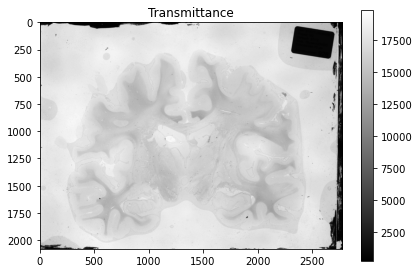

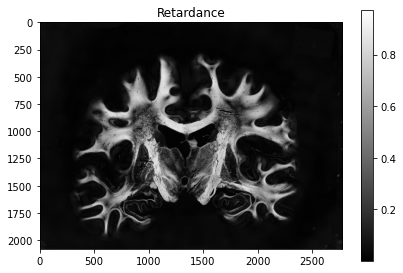

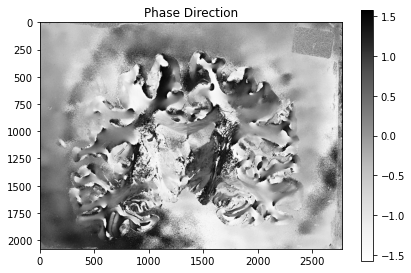

In [9]:
plt.figure()
plt.title("Transmittance")
plt.imshow(transmittance,cmap='gist_gray')
plt.colorbar()
plt.tight_layout()
plt.figure()
plt.title("Retardance")
plt.imshow(retardance,cmap='gist_gray')
plt.colorbar()
plt.tight_layout()
plt.figure()
plt.title("Phase Direction")
plt.imshow(direction_angle,cmap='Greys')
plt.colorbar()
plt.tight_layout()
plt.show()